Columns in dataset: ['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Inspection results', 'Defect rates', 'Transportation modes', 'Routes', 'Costs']


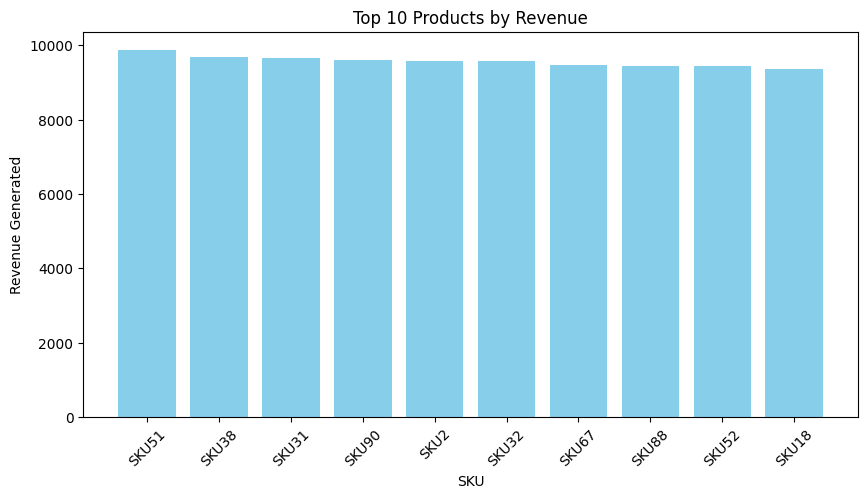

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Print column names to verify correct names
print("Columns in dataset:", df.columns.tolist())

# Ensure correct column name usage
expected_column = "Revenue generated"
if expected_column not in df.columns:
    print(f"Warning: Column '{expected_column}' not found! Using alternative names.")
    print("Available columns:", df.columns.tolist())

# Sort and plot top 10 products by revenue
top_revenue = df.sort_values(by="Revenue generated", ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(top_revenue["SKU"], top_revenue["Revenue generated"], color='skyblue')
plt.xlabel("SKU")
plt.ylabel("Revenue Generated")
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=45)
plt.show()


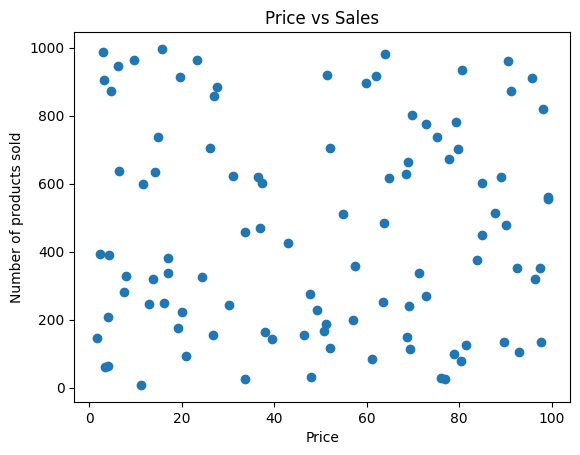

Correlation between price and sales: 0.005739484396580593


In [2]:
# Scatter plot
plt.scatter(df["Price"], df["Number of products sold"])
plt.xlabel("Price")
plt.ylabel("Number of products sold")
plt.title("Price vs Sales")
plt.show()

# Calculate correlation
correlation = df["Price"].corr(df["Number of products sold"])
print(f"Correlation between price and sales: {correlation}")

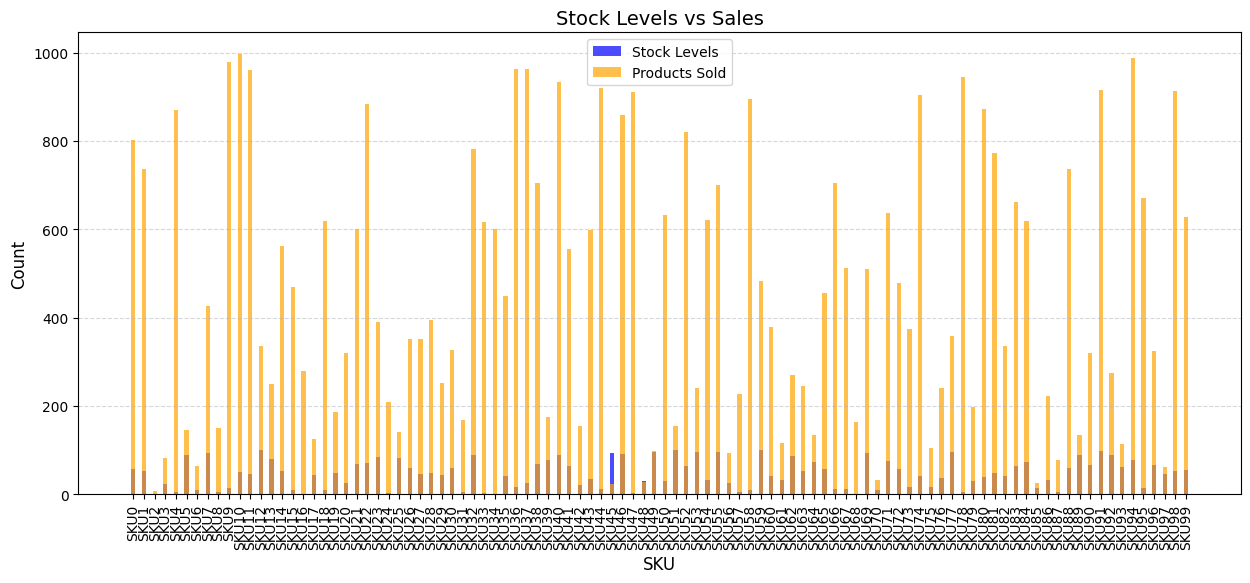

In [3]:
import matplotlib.pyplot as plt

# Set figure size to make the graph wider
plt.figure(figsize=(15, 6))

# Bar plot for Stock Levels and Products Sold
plt.bar(df["SKU"], df["Stock levels"], label="Stock Levels", width=0.4, color="blue", alpha=0.7)
plt.bar(df["SKU"], df["Number of products sold"], label="Products Sold", width=0.4, color="orange", alpha=0.7)

# Labels and title
plt.xlabel("SKU", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Stock Levels vs Sales", fontsize=14)

# Improve readability of SKU labels
plt.xticks(rotation=90, fontsize=10)

# Add legend
plt.legend()

# Show grid for better clarity
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the updated plot
plt.show()


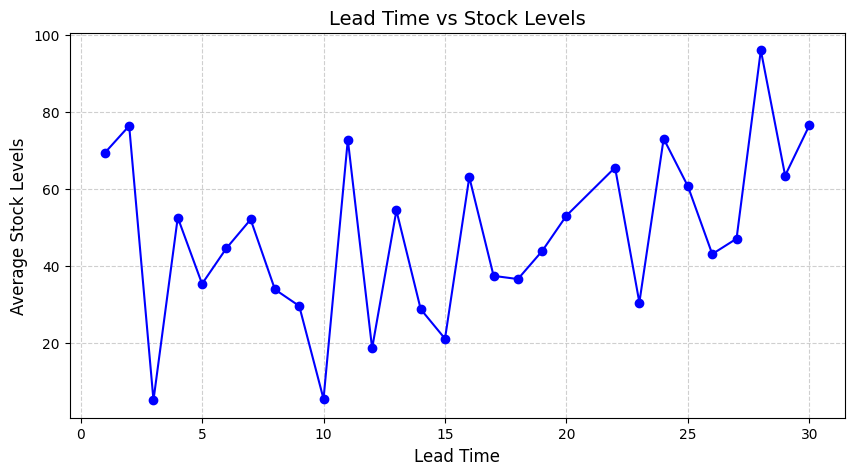

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Group by Lead_Times and calculate the average Stock Levels
lead_time_stock = df.groupby("Lead times")["Stock levels"].mean().reset_index()

# Plot Lead Time vs. Average Stock Levels
plt.figure(figsize=(10, 5))
plt.plot(lead_time_stock["Lead times"], lead_time_stock["Stock levels"], marker='o', linestyle='-', color='b')

# Labels and Title
plt.xlabel("Lead Time", fontsize=12)
plt.ylabel("Average Stock Levels", fontsize=12)
plt.title("Lead Time vs Stock Levels", fontsize=14)

# Show Grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


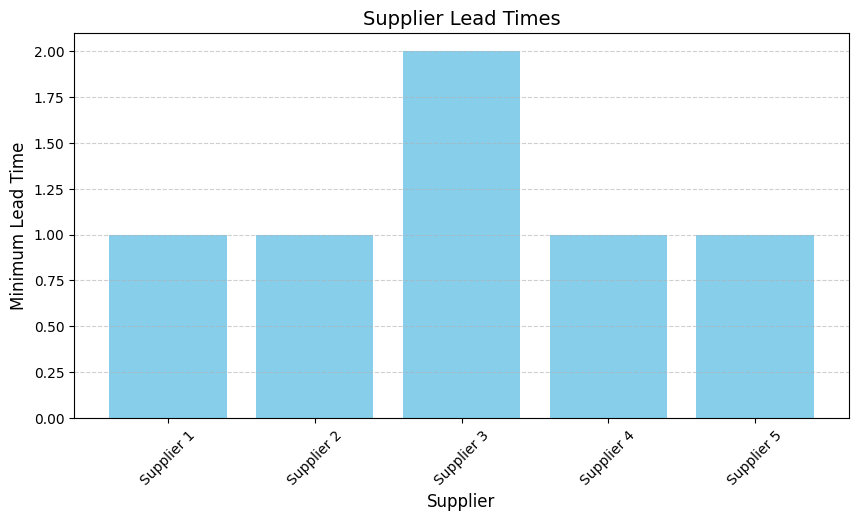

In [5]:
# Group by Supplier_Name and find the minimum Lead Time
supplier_lead_time = df.groupby("Supplier name")["Lead times"].min().reset_index()

# Plot Supplier vs. Minimum Lead Time
plt.figure(figsize=(10, 5))
plt.bar(supplier_lead_time["Supplier name"], supplier_lead_time["Lead times"], color="skyblue")

# Labels and Title
plt.xlabel("Supplier", fontsize=12)
plt.ylabel("Minimum Lead Time", fontsize=12)
plt.title("Supplier Lead Times", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show Grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

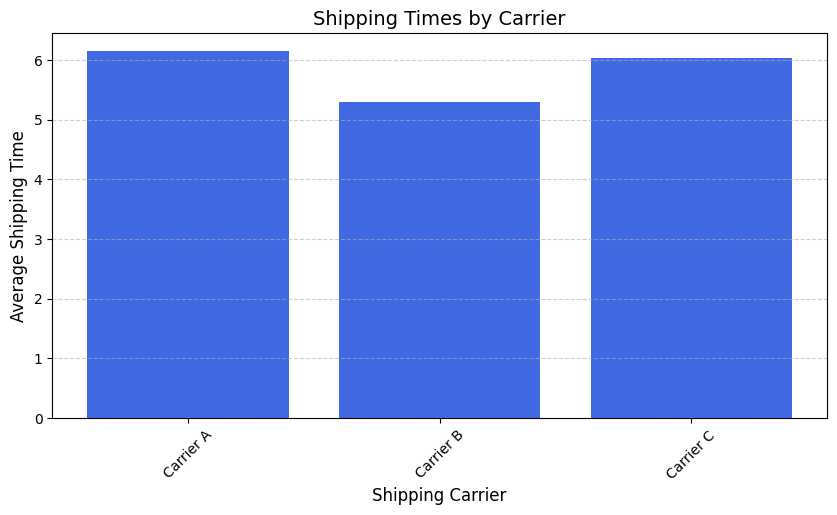

In [6]:
# Group by Shipping_Carriers and calculate the average Shipping Times
shipping_time_avg = df.groupby("Shipping carriers")["Shipping times"].mean().reset_index()

# Plot Shipping Carrier vs. Average Shipping Time
plt.figure(figsize=(10, 5))
plt.bar(shipping_time_avg["Shipping carriers"], shipping_time_avg["Shipping times"], color="royalblue")

# Labels and Title
plt.xlabel("Shipping Carrier", fontsize=12)
plt.ylabel("Average Shipping Time", fontsize=12)
plt.title("Shipping Times by Carrier", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show Grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

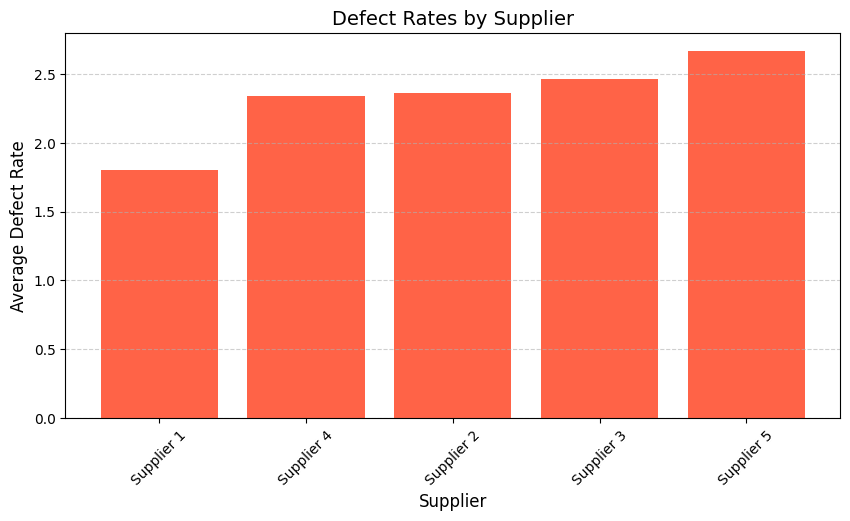

In [7]:
# Group by Supplier_Name and calculate the average Defect Rates
supplier_defect_rates = df.groupby("Supplier name")["Defect rates"].mean().reset_index()

# Sort by Avg_Defect_Rate for better visualization
supplier_defect_rates = supplier_defect_rates.sort_values(by="Defect rates", ascending=True)

# Plot Supplier vs. Average Defect Rate
plt.figure(figsize=(10, 5))
plt.bar(supplier_defect_rates["Supplier name"], supplier_defect_rates["Defect rates"], color="tomato")

# Labels and Title
plt.xlabel("Supplier", fontsize=12)
plt.ylabel("Average Defect Rate", fontsize=12)
plt.title("Defect Rates by Supplier", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show Grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

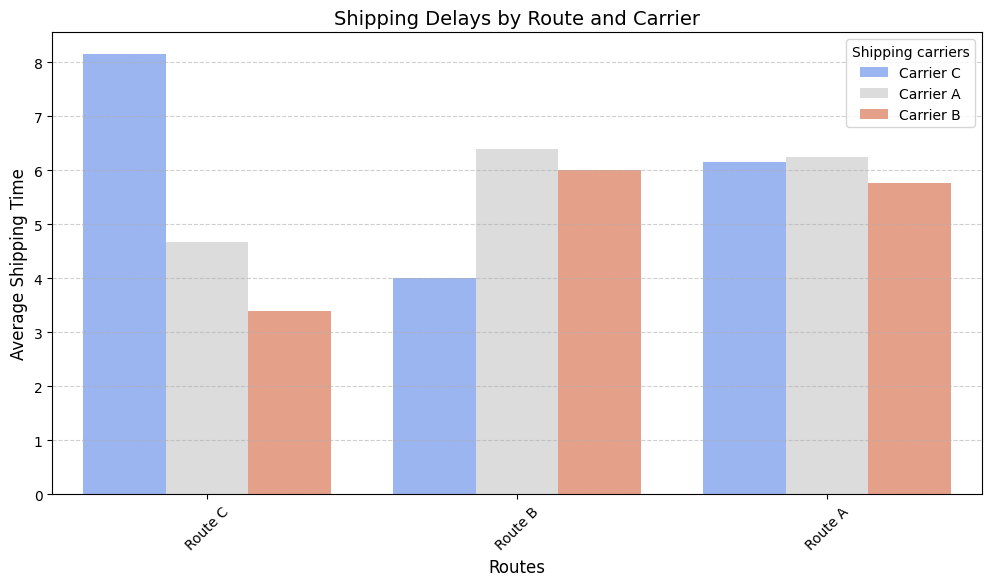

In [8]:
import seaborn as sns
# Group by Routes and Shipping_Carriers and calculate the average Shipping Times
shipping_delays = df.groupby(["Routes", "Shipping carriers"])["Shipping times"].mean().reset_index()

# Sort by Avg_Shipping_Time in descending order
shipping_delays = shipping_delays.sort_values(by="Shipping times", ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=shipping_delays, x="Routes", y="Shipping times", hue="Shipping carriers", palette="coolwarm")

# Labels and Title
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Average Shipping Time", fontsize=12)
plt.title("Shipping Delays by Route and Carrier", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show Grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

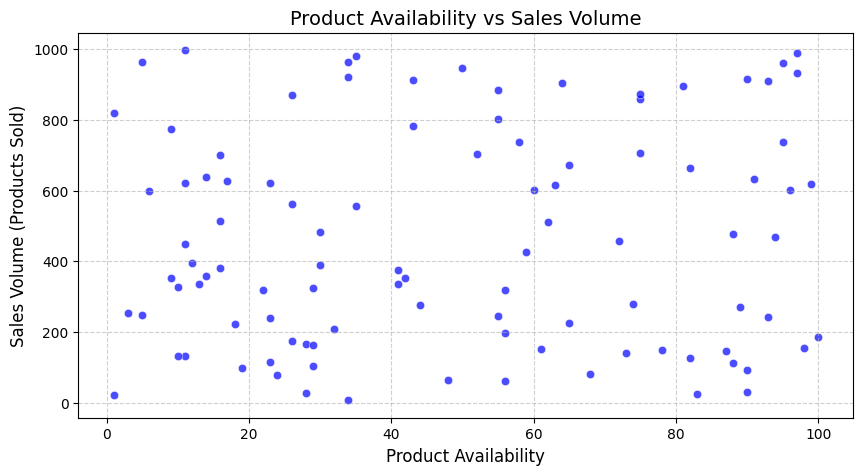

Correlation between Product Availability and Sales Volume: 0.0875


In [9]:
import seaborn as sns
# Scatter plot to show the relationship between Availability and Sales Volume
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Availability", y="Number of products sold", color="blue", alpha=0.7)

# Labels and Title
plt.xlabel("Product Availability", fontsize=12)
plt.ylabel("Sales Volume (Products Sold)", fontsize=12)
plt.title("Product Availability vs Sales Volume", fontsize=14)

# Show Grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

# Calculate Correlation
correlation = df["Availability"].corr(df["Number of products sold"])
print(f"Correlation between Product Availability and Sales Volume: {correlation:.4f}")

<Figure size 2000x600 with 0 Axes>

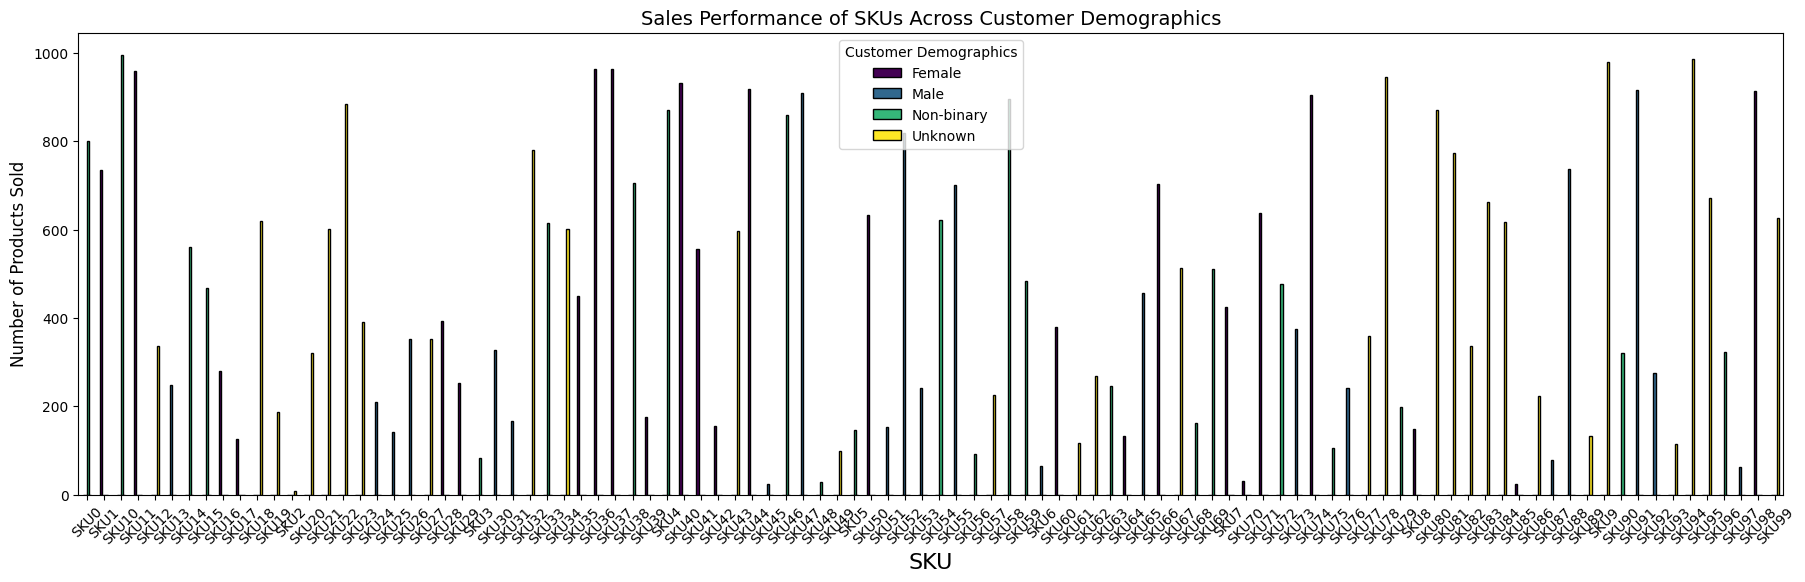

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Group data by SKU and Customer Demographics
sku_performance = df.groupby(["SKU", "Customer demographics"])["Number of products sold"].sum().reset_index()

# Pivot for bar chart format
pivot_data = sku_performance.pivot(index="SKU", columns="Customer demographics", values="Number of products sold")

# Fill missing values with 0
pivot_data = pivot_data.fillna(0)

# Set figure size
plt.figure(figsize=(20, 6))

# Create grouped bar chart
pivot_data.plot(kind="bar", stacked=False, figsize=(22, 6), colormap="viridis", edgecolor="black")

# Labels and title
plt.xlabel("SKU", fontsize=16)
plt.ylabel("Number of Products Sold", fontsize=12)
plt.title("Sales Performance of SKUs Across Customer Demographics", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Customer Demographics")

# Show the plot
plt.show()


In [11]:
import pandas as pd

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Group by SKU and Customer Demographics and get total sales
sku_sales = df.groupby(["SKU", "Customer demographics"])["Number of products sold"].sum().reset_index()

# Find the best-selling product in each customer demographic
best_sellers = sku_sales.loc[sku_sales.groupby("Customer demographics")["Number of products sold"].idxmax()]

# Display results
print(best_sellers)


      SKU Customer demographics  Number of products sold
30  SKU36                Female                      963
91  SKU91                  Male                      916
2   SKU10            Non-binary                      996
94  SKU94               Unknown                      987


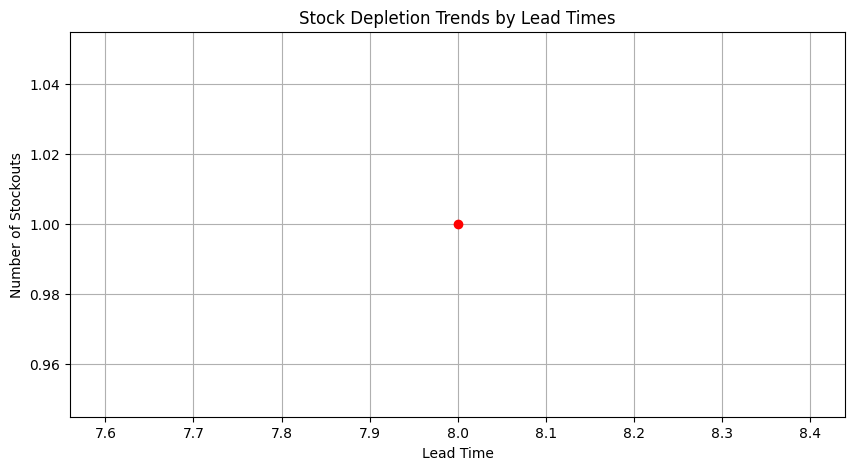

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Check if 'Lead_Times' is numeric
df["Lead times"] = pd.to_numeric(df["Lead times"], errors="coerce")

# Filter stock depletion occurrences
seasonal_stockouts = df[df["Stock levels"] == 0].groupby("Lead times").size().reset_index(name="Stockout count")

# Plot stock depletion trends by lead times
plt.figure(figsize=(10, 5))
plt.plot(seasonal_stockouts["Lead times"], seasonal_stockouts["Stockout count"], marker="o", linestyle="-", color="red")
plt.xlabel("Lead Time")
plt.ylabel("Number of Stockouts")
plt.title("Stock Depletion Trends by Lead Times")
plt.grid(True)
plt.show()


     SKU  Stockout occurrences
0  SKU68                     1


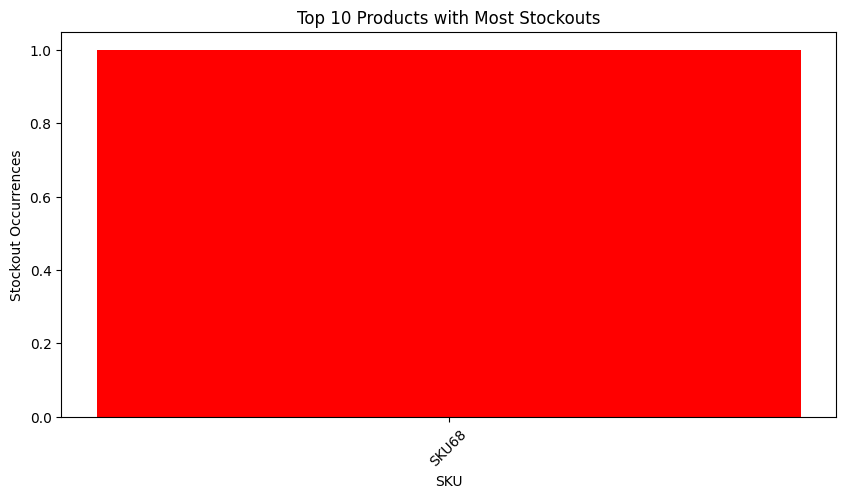

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Filter products with stockout occurrences
stockout_products = df[df["Stock levels"] == 0]["SKU"].value_counts().reset_index()
stockout_products.columns = ["SKU", "Stockout occurrences"]

# Display top stockout products
print(stockout_products.head(10))

# Plot stockouts for top products
plt.figure(figsize=(10, 5))
plt.bar(stockout_products["SKU"][:10], stockout_products["Stockout occurrences"][:10], color="red")
plt.xlabel("SKU")
plt.ylabel("Stockout Occurrences")
plt.title("Top 10 Products with Most Stockouts")
plt.xticks(rotation=45)
plt.show()


     SKU  Avg_Reorder_Quantity  Avg_Stock_Levels  Avg_Inventory_Cost
0  SKU15                  69.0               9.0          127.861800
1  SKU16                  78.0               2.0          865.525780
2   SKU2                  88.0               1.0          141.920282
3  SKU24                   2.0               4.0          758.724773
4  SKU31                  44.0               6.0          609.379207
5  SKU33                  95.0               4.0          371.255296
6  SKU34                  21.0               1.0          510.358000
7   SKU4                  56.0               5.0          923.440632
8  SKU47                  51.0               4.0          581.602355
9  SKU57                  51.0               5.0          482.191239


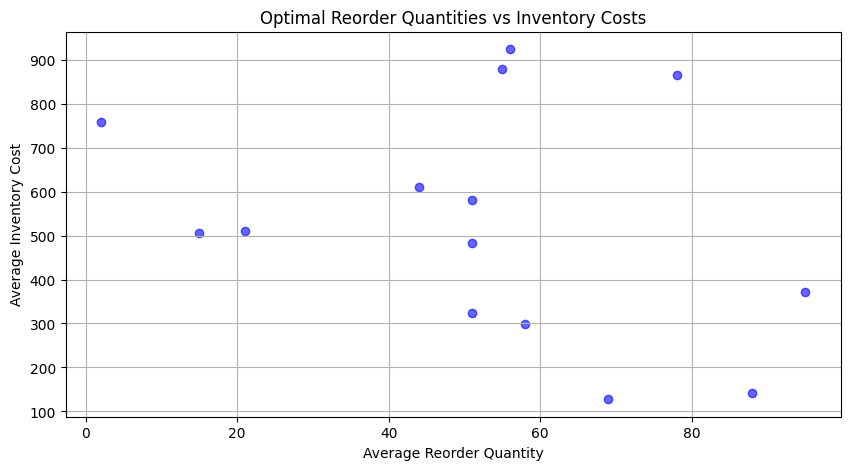

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Define stockout threshold (e.g., stock levels below 10)
stockout_threshold = 10

# Filter products at risk of stockouts
at_risk_products = df[df["Stock levels"] < stockout_threshold]

# Calculate optimal reorder quantities and costs
optimal_reorder = at_risk_products.groupby("SKU").agg({
    "Order quantities": "mean",
    "Stock levels": "mean",
    "Costs": "mean"
}).reset_index()

# Rename columns for clarity
optimal_reorder.columns = ["SKU", "Avg_Reorder_Quantity", "Avg_Stock_Levels", "Avg_Inventory_Cost"]

# Display top results
print(optimal_reorder.head(10))

# Plot reorder quantities vs. inventory costs
plt.figure(figsize=(10, 5))
plt.scatter(optimal_reorder["Avg_Reorder_Quantity"], optimal_reorder["Avg_Inventory_Cost"], color="blue", alpha=0.6)
plt.xlabel("Average Reorder Quantity")
plt.ylabel("Average Inventory Cost")
plt.title("Optimal Reorder Quantities vs Inventory Costs")
plt.grid(True)
plt.show()


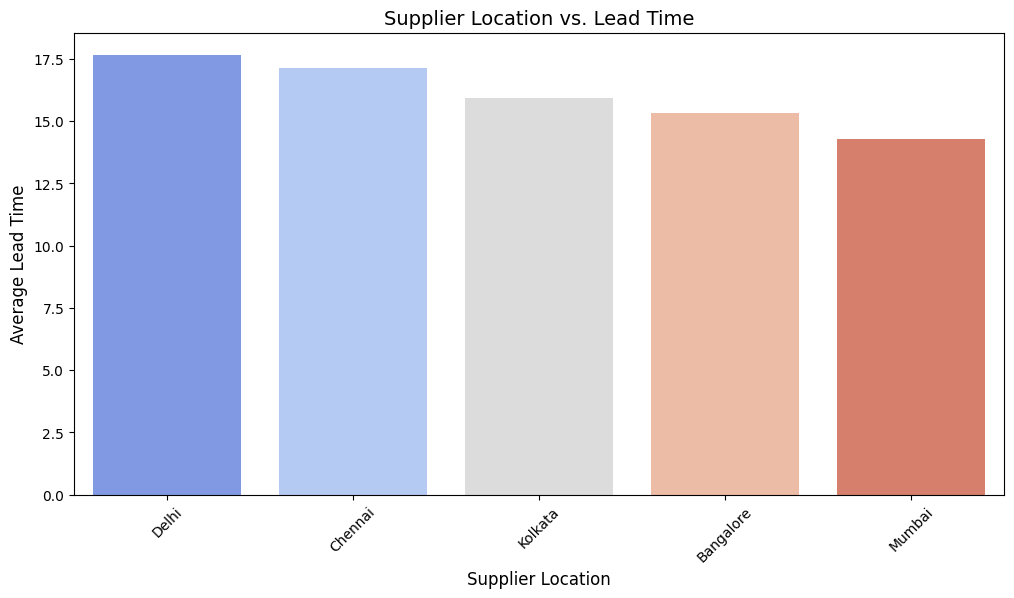

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Group by Supplier Location and calculate average lead time
location_lead_time = df.groupby("Location")["Lead times"].mean().reset_index()

# Sort by lead time for better visualization
location_lead_time = location_lead_time.sort_values(by="Lead times", ascending=False)

# Plot lead times by supplier location
plt.figure(figsize=(12, 6))
sns.barplot(data=location_lead_time, x="Location", y="Lead times", palette="coolwarm")

# Labels and title
plt.xlabel("Supplier Location", fontsize=12)
plt.ylabel("Average Lead Time", fontsize=12)
plt.title("Supplier Location vs. Lead Time", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()


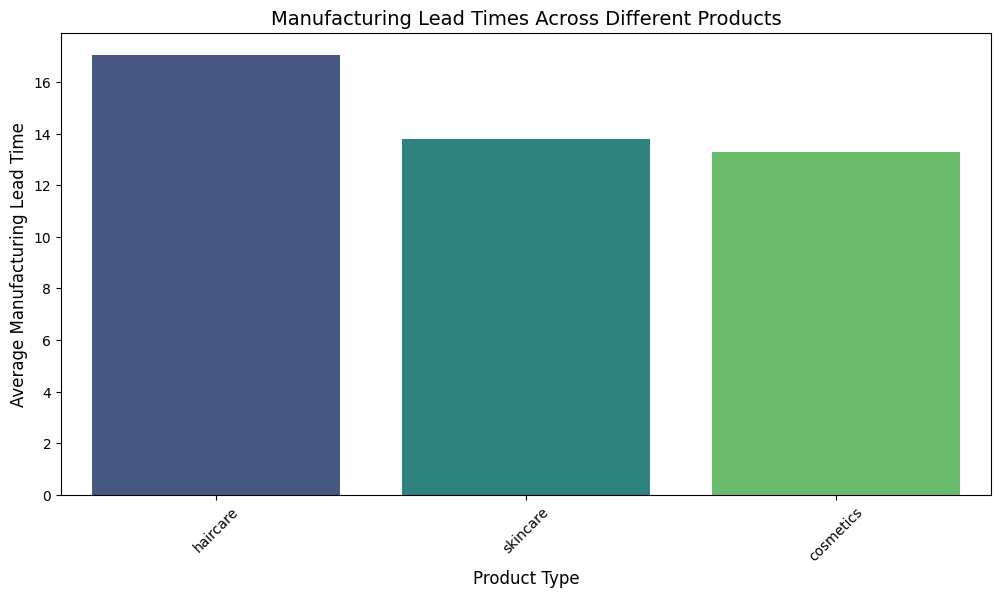

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Group by Product Type and calculate average manufacturing lead time
product_lead_time = df.groupby("Product type")["Manufacturing lead time"].mean().reset_index()

# Sort by manufacturing lead time for better visualization
product_lead_time = product_lead_time.sort_values(by="Manufacturing lead time", ascending=False)

# Plot manufacturing lead times by product type
plt.figure(figsize=(12, 6))
sns.barplot(data=product_lead_time, x="Product type", y="Manufacturing lead time", palette="viridis")

# Labels and title
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Average Manufacturing Lead Time", fontsize=12)
plt.title("Manufacturing Lead Times Across Different Products", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()


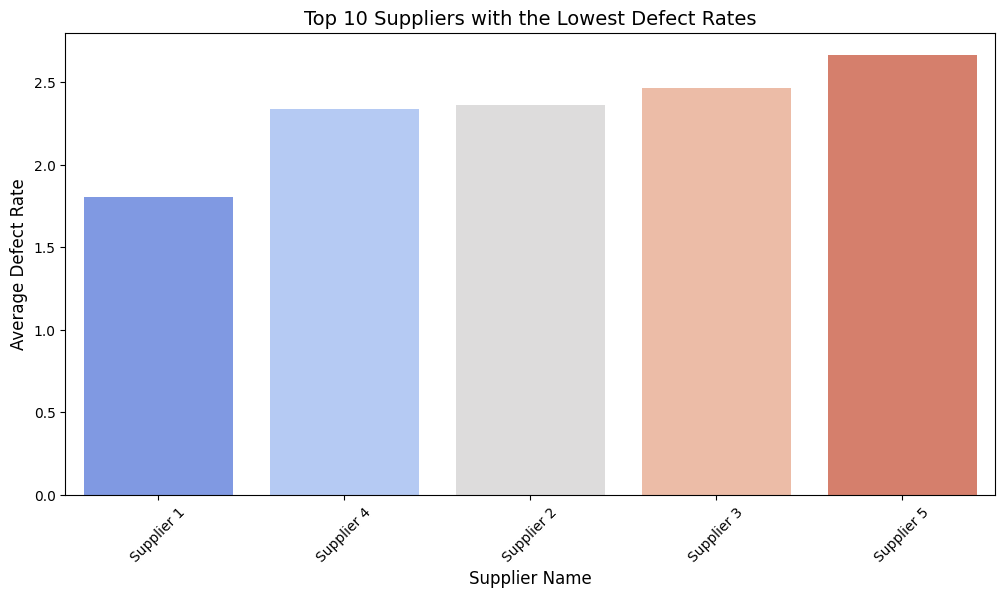

In [17]:
# Group by Supplier Name and calculate average defect rates
supplier_defect_rates = df.groupby("Supplier name")["Defect rates"].mean().reset_index()

# Sort by defect rate (ascending) to show the best suppliers first
supplier_defect_rates = supplier_defect_rates.sort_values(by="Defect rates", ascending=True).head(10)

# Plot defect rates by supplier
plt.figure(figsize=(12, 6))
sns.barplot(data=supplier_defect_rates, x="Supplier name", y="Defect rates", palette="coolwarm")

# Labels and title
plt.xlabel("Supplier Name", fontsize=12)
plt.ylabel("Average Defect Rate", fontsize=12)
plt.title("Top 10 Suppliers with the Lowest Defect Rates", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()

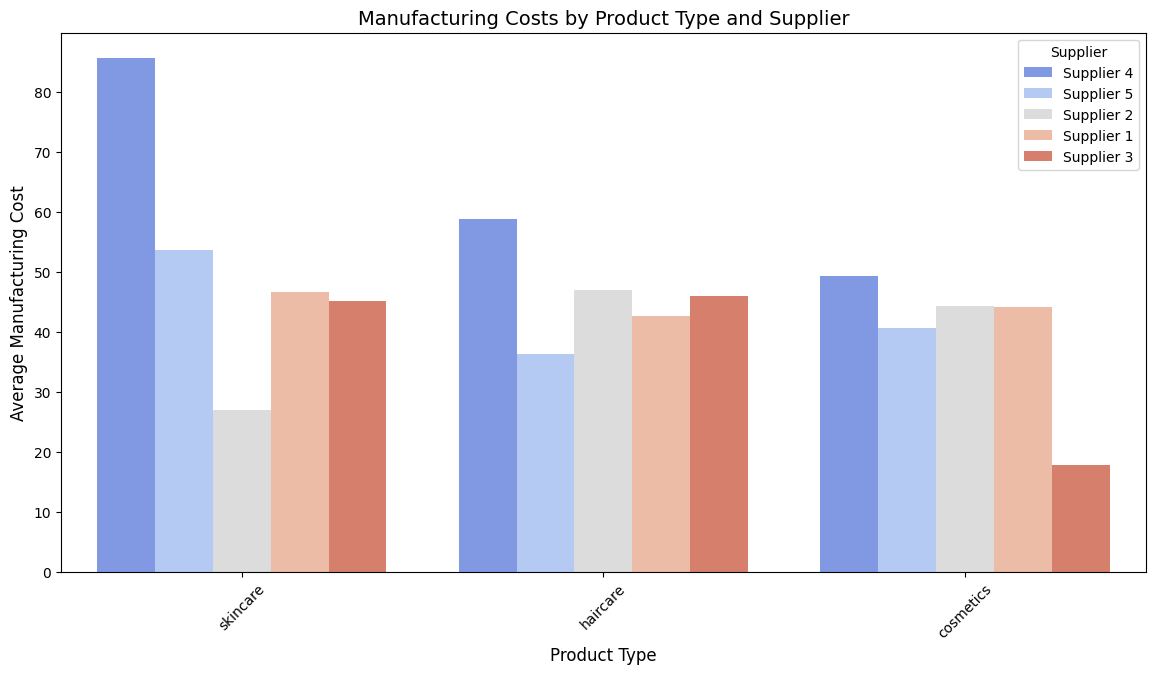

In [18]:
# Group by Product Type and Supplier, then calculate average manufacturing costs
manufacturing_costs = df.groupby(["Product type", "Supplier name"])["Manufacturing costs"].mean().reset_index()

# Sort by manufacturing costs for better visualization
manufacturing_costs = manufacturing_costs.sort_values(by="Manufacturing costs", ascending=False)

# Set figure size
plt.figure(figsize=(14, 7))

# Create a grouped bar chart
sns.barplot(data=manufacturing_costs, x="Product type", y="Manufacturing costs", hue="Supplier name", palette="coolwarm")

# Labels and title
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Average Manufacturing Cost", fontsize=12)
plt.title("Manufacturing Costs by Product Type and Supplier", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the legend
plt.legend(title="Supplier")

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


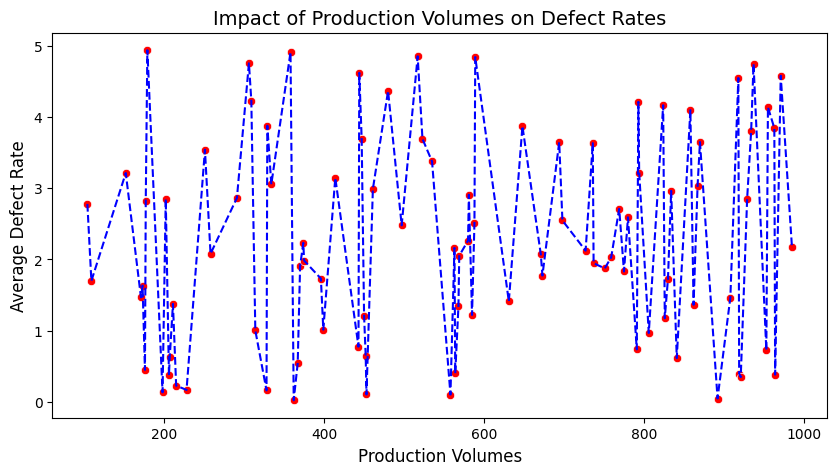

In [19]:
# Group by Production Volumes and calculate the average defect rate
production_defects = df.groupby("Production volumes")["Defect rates"].mean().reset_index()

# Sort by production volume for better visualization
production_defects = production_defects.sort_values(by="Production volumes")

# Set figure size
plt.figure(figsize=(10, 5))

# Create a scatter plot to show the relationship
sns.scatterplot(data=production_defects, x="Production volumes", y="Defect rates", color="red")

# Create a trend line for better interpretation
sns.lineplot(data=production_defects, x="Production volumes", y="Defect rates", color="blue", linestyle="dashed")

# Labels and title
plt.xlabel("Production Volumes", fontsize=12)
plt.ylabel("Average Defect Rate", fontsize=12)
plt.title("Impact of Production Volumes on Defect Rates", fontsize=14)

# Show the plot
plt.show()

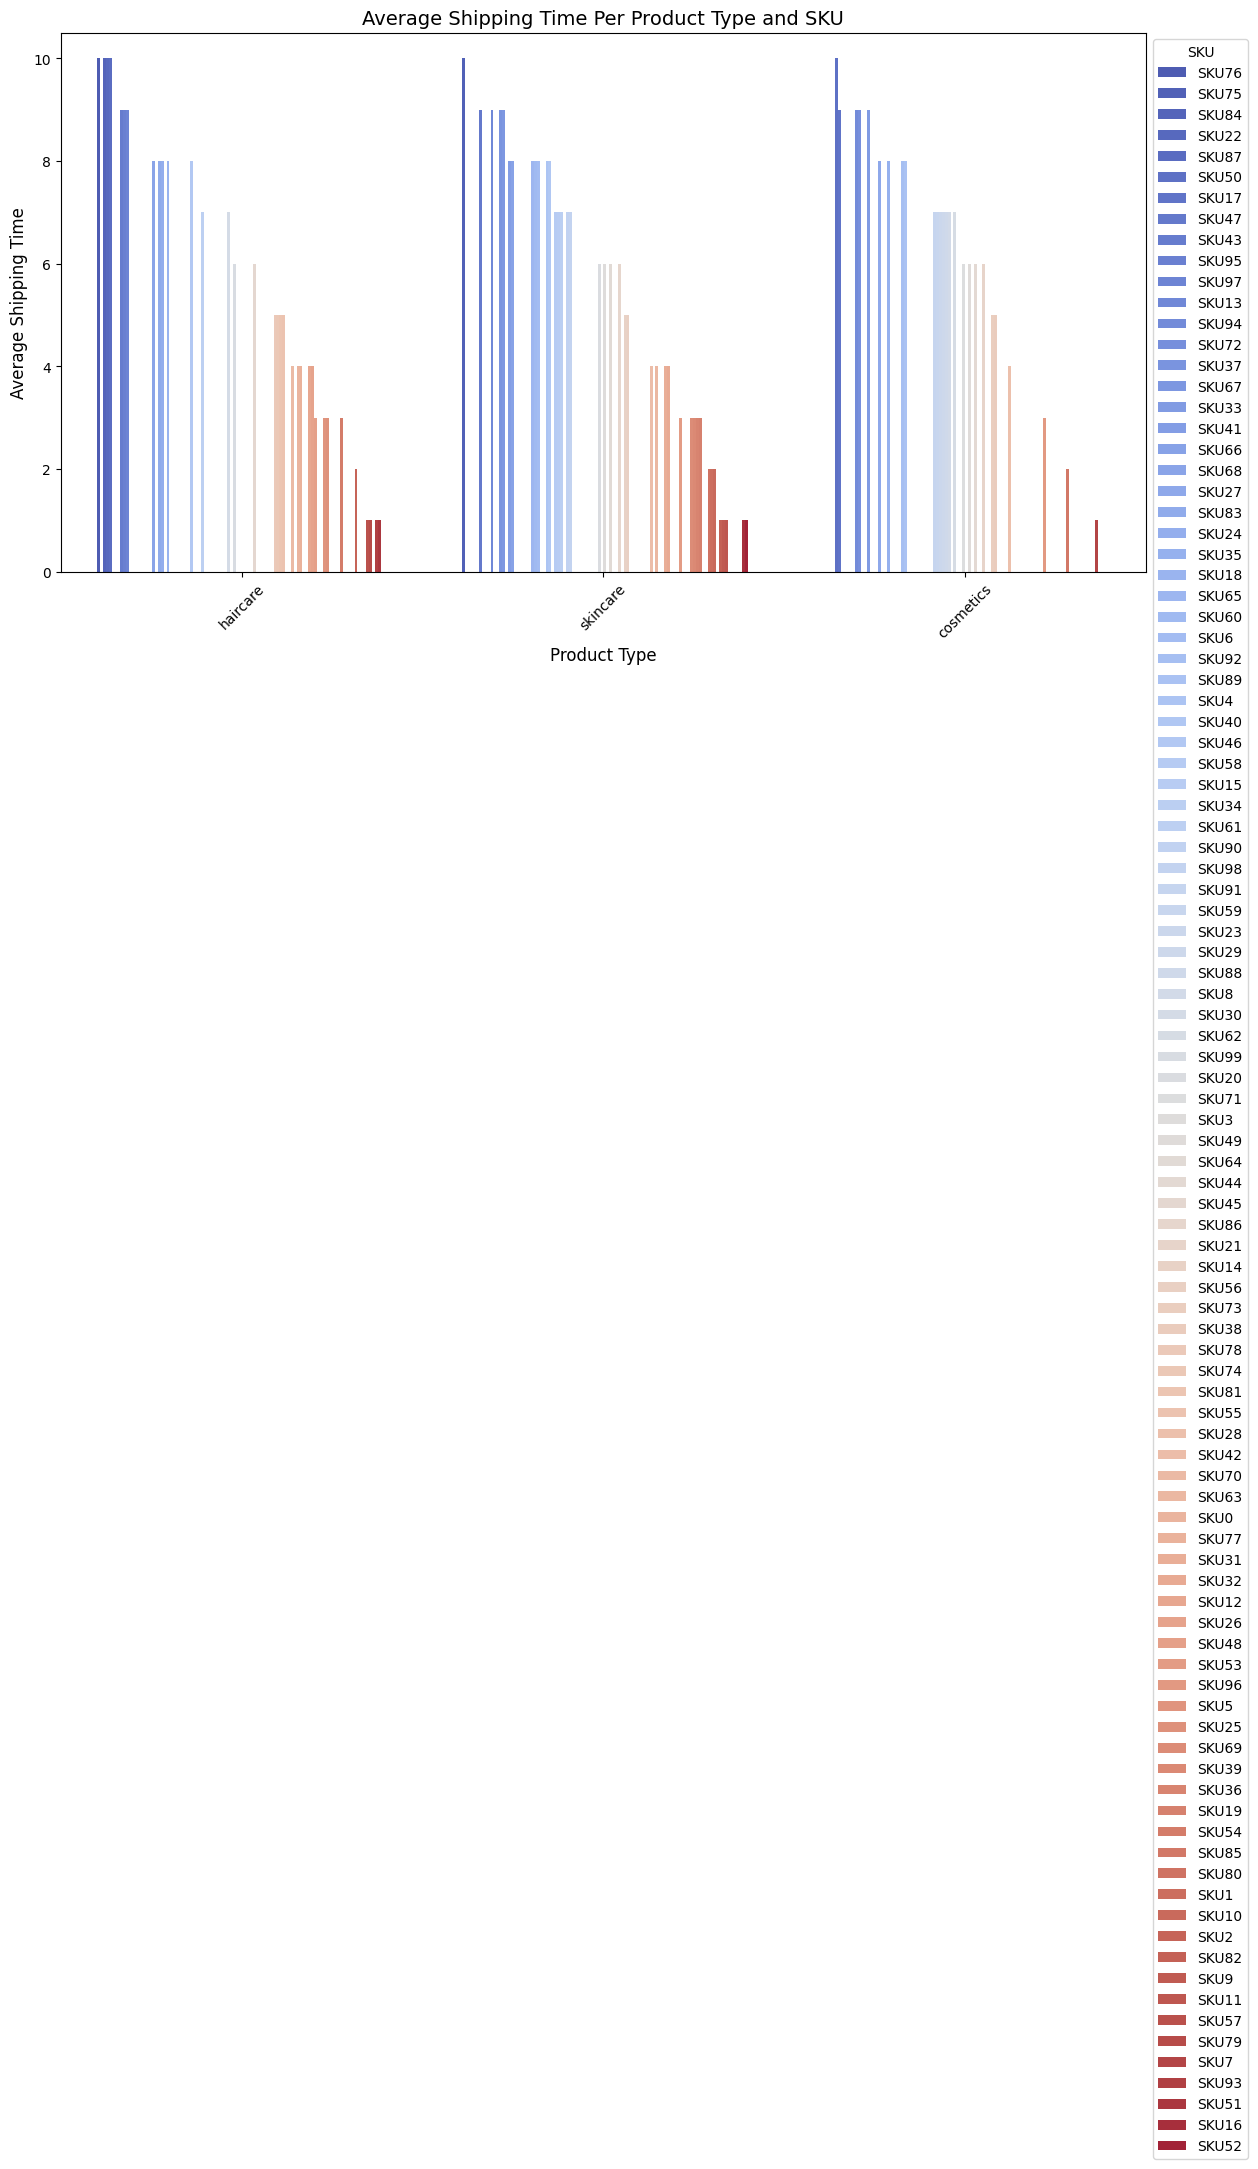

In [20]:
# Group by Product Type and SKU to calculate average shipping times
shipping_time = df.groupby(["Product type", "SKU"])["Shipping times"].mean().reset_index()

# Sort by shipping time for better visualization
shipping_time = shipping_time.sort_values(by="Shipping times", ascending=False)

# Set figure size
plt.figure(figsize=(14, 7))

# Create a bar chart
sns.barplot(data=shipping_time, x="Product type", y="Shipping times", hue="SKU", palette="coolwarm")

# Labels and title
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Average Shipping Time", fontsize=12)
plt.title("Average Shipping Time Per Product Type and SKU", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the legend
plt.legend(title="SKU", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

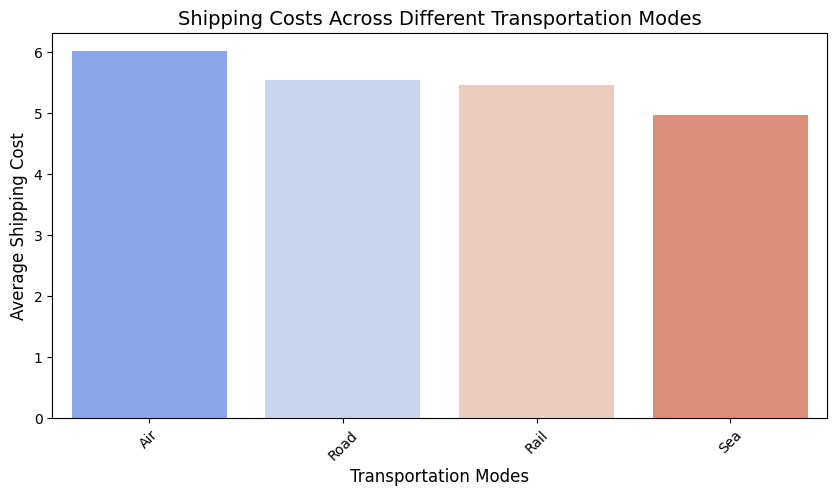

In [21]:
# Group by Transportation Mode and calculate average shipping cost
shipping_costs = df.groupby("Transportation modes")["Shipping costs"].mean().reset_index()

# Sort by shipping cost for better visualization
shipping_costs = shipping_costs.sort_values(by="Shipping costs", ascending=False)

# Set figure size
plt.figure(figsize=(10, 5))

# Create a bar chart
sns.barplot(data=shipping_costs, x="Transportation modes", y="Shipping costs", palette="coolwarm")

# Labels and title
plt.xlabel("Transportation Modes", fontsize=12)
plt.ylabel("Average Shipping Cost", fontsize=12)
plt.title("Shipping Costs Across Different Transportation Modes", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()

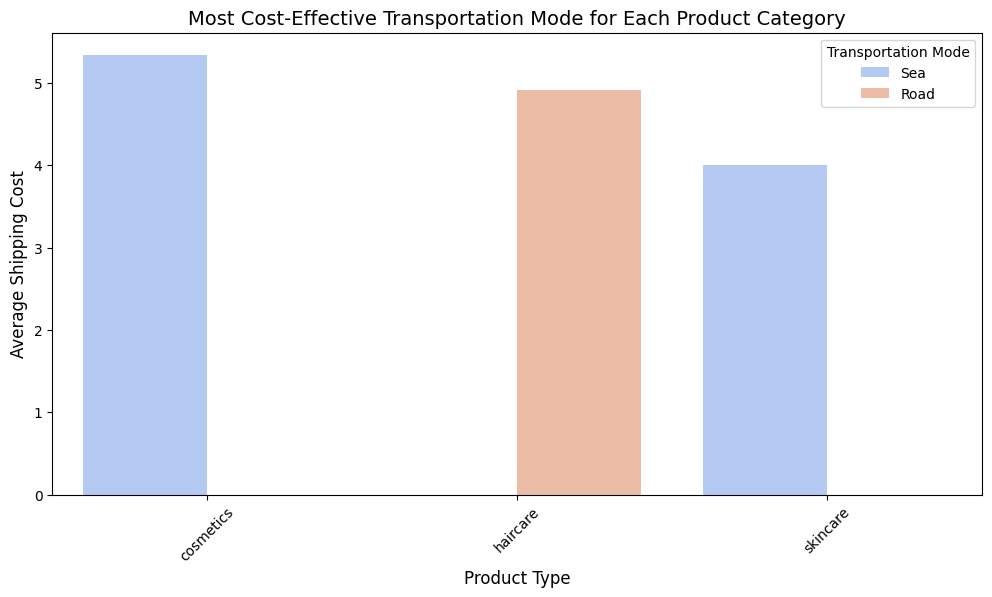

In [22]:
# Group by Product Type and Transportation Mode, then calculate the average shipping cost
transport_costs = df.groupby(["Product type", "Transportation modes"])["Shipping costs"].mean().reset_index()

# Sort by shipping cost for better visualization
transport_costs = transport_costs.sort_values(by=["Product type", "Shipping costs"], ascending=[True, True])

# Find the most cost-effective transportation mode for each product type
cost_effective_modes = transport_costs.loc[transport_costs.groupby("Product type")["Shipping costs"].idxmin()]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart
sns.barplot(data=cost_effective_modes, x="Product type", y="Shipping costs", hue="Transportation modes", palette="coolwarm")

# Labels and title
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Average Shipping Cost", fontsize=12)
plt.title("Most Cost-Effective Transportation Mode for Each Product Category", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the legend
plt.legend(title="Transportation Mode")

# Show the plot
plt.show()

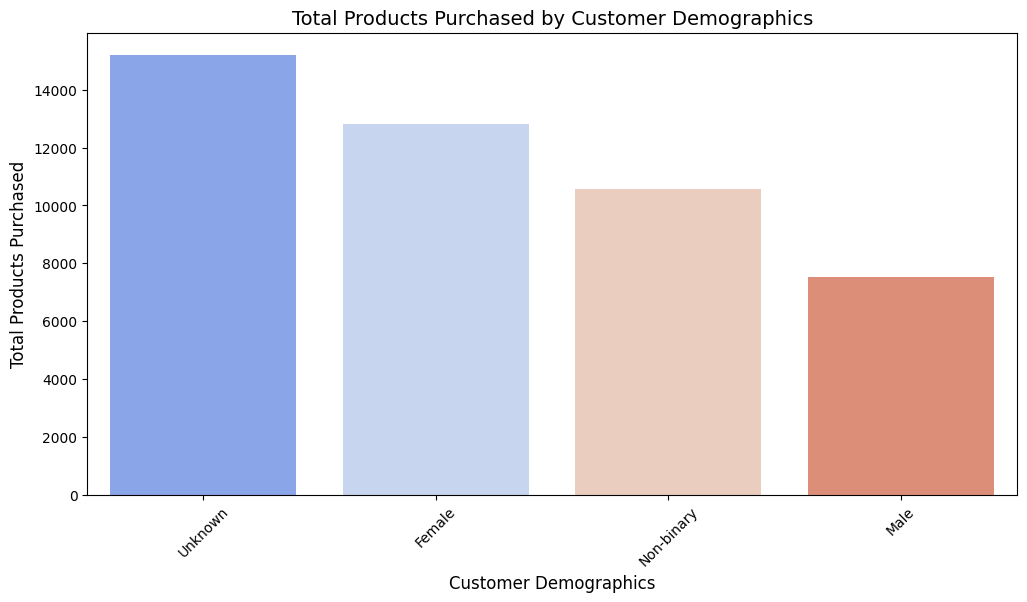

In [23]:
# Group by Customer Demographics and calculate total purchases
customer_purchases = df.groupby("Customer demographics")["Number of products sold"].sum().reset_index()

# Sort by total purchases for better visualization
customer_purchases = customer_purchases.sort_values(by="Number of products sold", ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart
sns.barplot(data=customer_purchases, x="Customer demographics", y="Number of products sold", palette="coolwarm")

# Labels and title
plt.xlabel("Customer Demographics", fontsize=12)
plt.ylabel("Total Products Purchased", fontsize=12)
plt.title("Total Products Purchased by Customer Demographics", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()

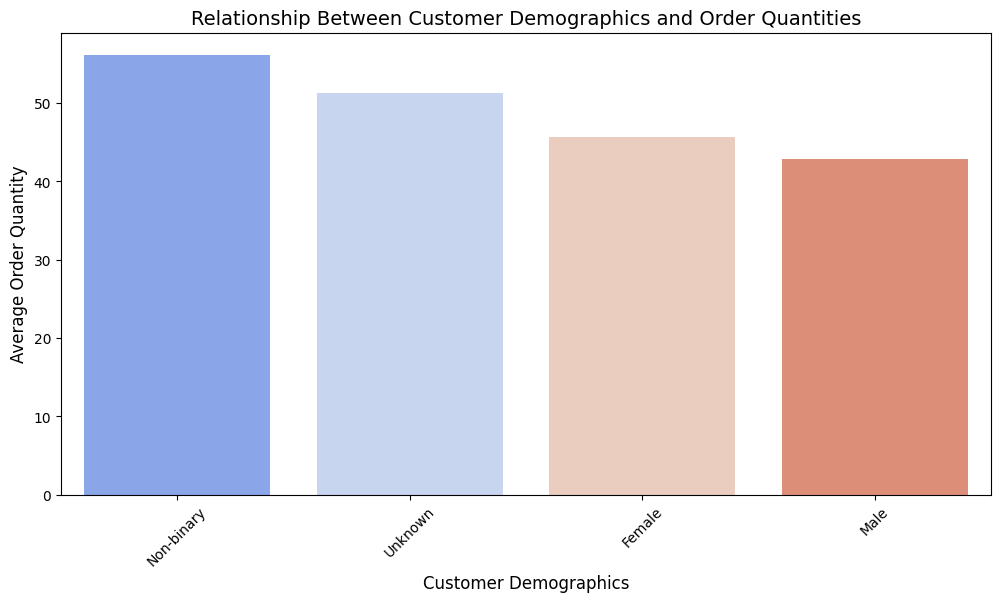

In [24]:
# Group by Customer Demographics and calculate average order quantities
customer_orders = df.groupby("Customer demographics")["Order quantities"].mean().reset_index()

# Sort by order quantity for better visualization
customer_orders = customer_orders.sort_values(by="Order quantities", ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar chart
sns.barplot(data=customer_orders, x="Customer demographics", y="Order quantities", palette="coolwarm")

# Labels and title
plt.xlabel("Customer Demographics", fontsize=12)
plt.ylabel("Average Order Quantity", fontsize=12)
plt.title("Relationship Between Customer Demographics and Order Quantities", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.show()

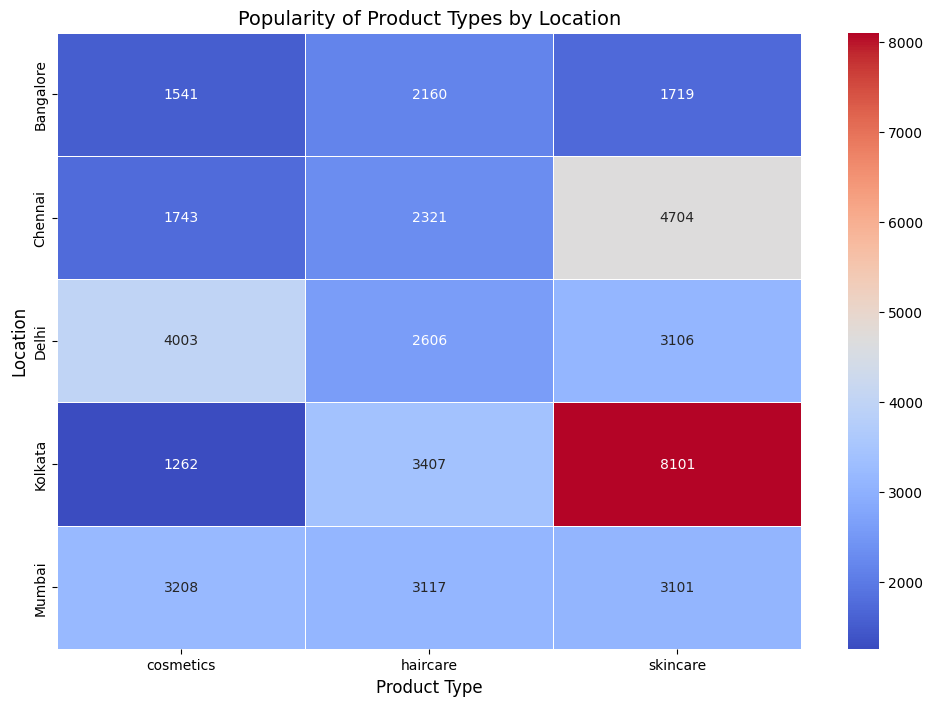

In [25]:
# Group by Product Type and Location to calculate total sales
product_location_sales = df.groupby(["Product type", "Location"])["Number of products sold"].sum().reset_index()

# Pivot data for better visualization
pivot_data = product_location_sales.pivot(index="Location", columns="Product type", values="Number of products sold").fillna(0)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(pivot_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Labels and title
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.title("Popularity of Product Types by Location", fontsize=14)

# Show the plot
plt.show()

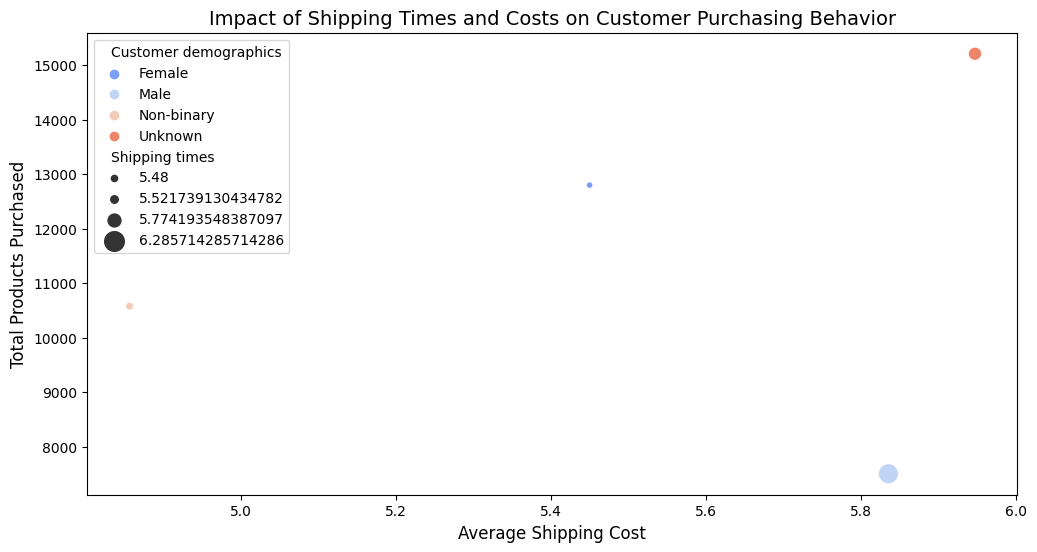

In [26]:
# Group by Customer Demographics and calculate shipping impact on purchases
shipping_behavior = df.groupby("Customer demographics").agg({
    "Shipping times": "mean",
    "Shipping costs": "mean",
    "Number of products sold": "sum"
}).reset_index()

# Set figure size
plt.figure(figsize=(12, 6))

# Create scatter plot to show impact of shipping costs
sns.scatterplot(data=shipping_behavior, x="Shipping costs", y="Number of products sold", size="Shipping times", hue="Customer demographics", palette="coolwarm", sizes=(20, 200))

# Labels and title
plt.xlabel("Average Shipping Cost", fontsize=12)
plt.ylabel("Total Products Purchased", fontsize=12)
plt.title("Impact of Shipping Times and Costs on Customer Purchasing Behavior", fontsize=14)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


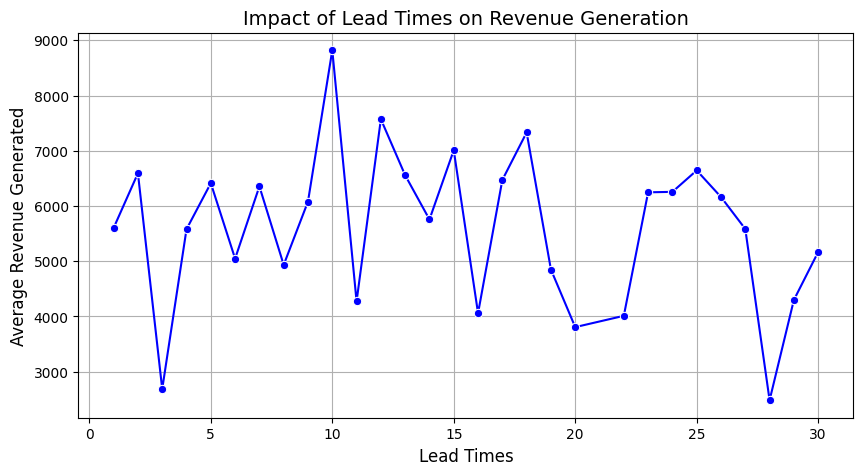

In [27]:
# Group by Lead Times and calculate average revenue
lead_time_revenue = df.groupby("Lead times")["Revenue generated"].mean().reset_index()

# Sort by lead time for better visualization
lead_time_revenue = lead_time_revenue.sort_values(by="Lead times")

# Set figure size
plt.figure(figsize=(10, 5))

# Create a line plot to show the relationship
sns.lineplot(data=lead_time_revenue, x="Lead times", y="Revenue generated", marker="o", color="blue")

# Labels and title
plt.xlabel("Lead Times", fontsize=12)
plt.ylabel("Average Revenue Generated", fontsize=12)
plt.title("Impact of Lead Times on Revenue Generation", fontsize=14)

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()

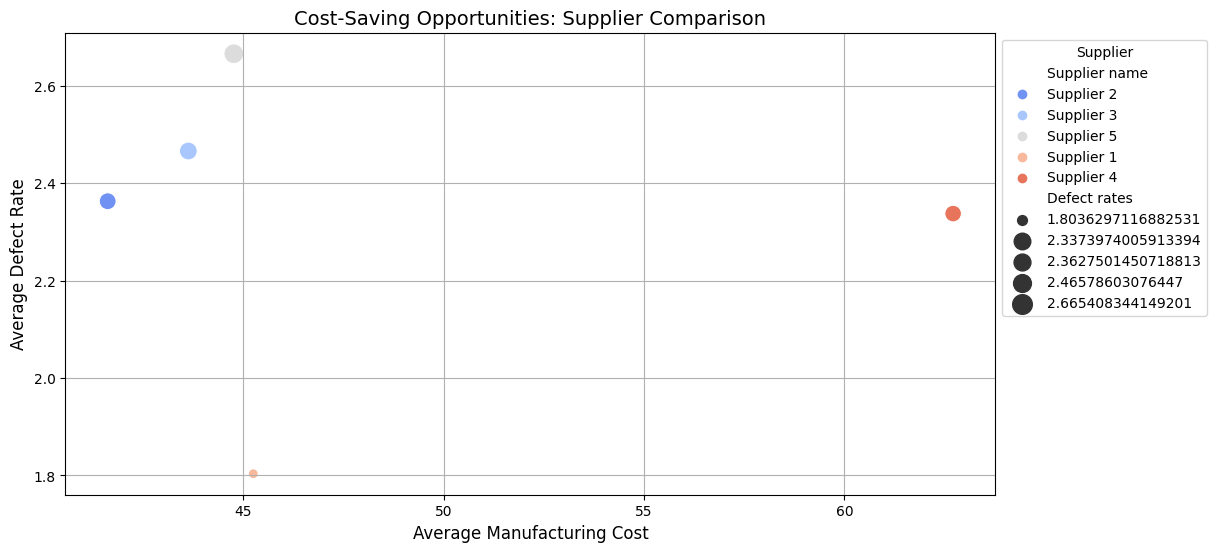

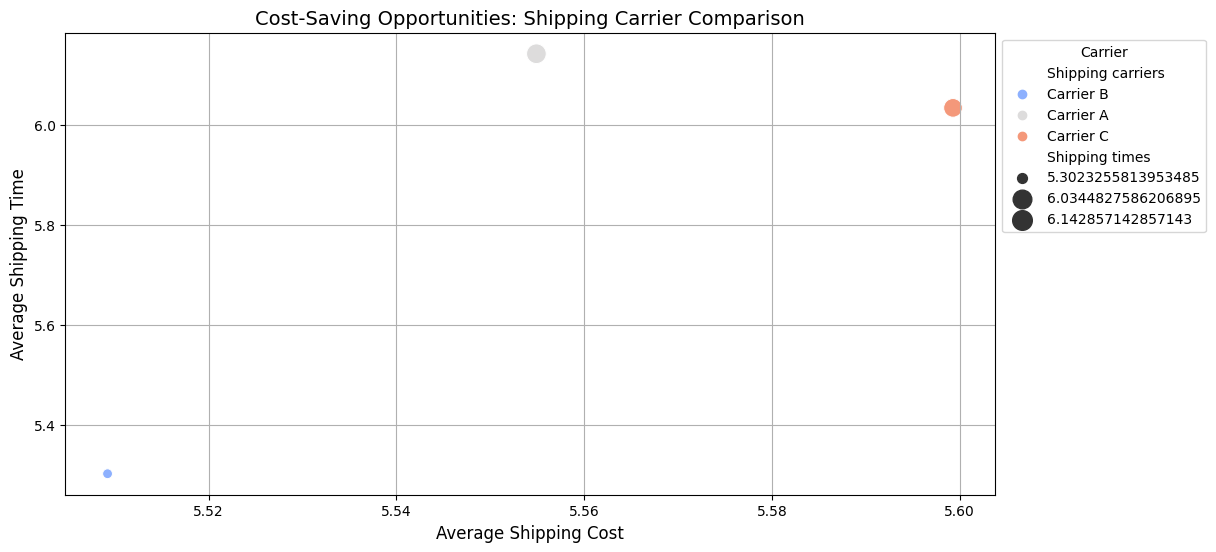

In [28]:
# Group by Supplier Name and calculate average manufacturing cost and defect rate
supplier_analysis = df.groupby("Supplier name").agg({
    "Manufacturing costs": "mean",
    "Defect rates": "mean"
}).reset_index()

# Sort suppliers by manufacturing cost
supplier_analysis = supplier_analysis.sort_values(by=["Manufacturing costs", "Defect rates"])

# Plot Supplier Comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(data=supplier_analysis, x="Manufacturing costs", y="Defect rates", hue="Supplier name", palette="coolwarm", size="Defect rates", sizes=(50, 200))
plt.xlabel("Average Manufacturing Cost", fontsize=12)
plt.ylabel("Average Defect Rate", fontsize=12)
plt.title("Cost-Saving Opportunities: Supplier Comparison", fontsize=14)
plt.legend(title="Supplier", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Group by Shipping Carriers and calculate average shipping cost and time
carrier_analysis = df.groupby("Shipping carriers").agg({
    "Shipping costs": "mean",
    "Shipping times": "mean"
}).reset_index()

# Sort carriers by cost and time
carrier_analysis = carrier_analysis.sort_values(by=["Shipping costs", "Shipping times"])

# Plot Shipping Carrier Comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(data=carrier_analysis, x="Shipping costs", y="Shipping times", hue="Shipping carriers", palette="coolwarm", size="Shipping times", sizes=(50, 200))
plt.xlabel("Average Shipping Cost", fontsize=12)
plt.ylabel("Average Shipping Time", fontsize=12)
plt.title("Cost-Saving Opportunities: Shipping Carrier Comparison", fontsize=14)
plt.legend(title="Carrier", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

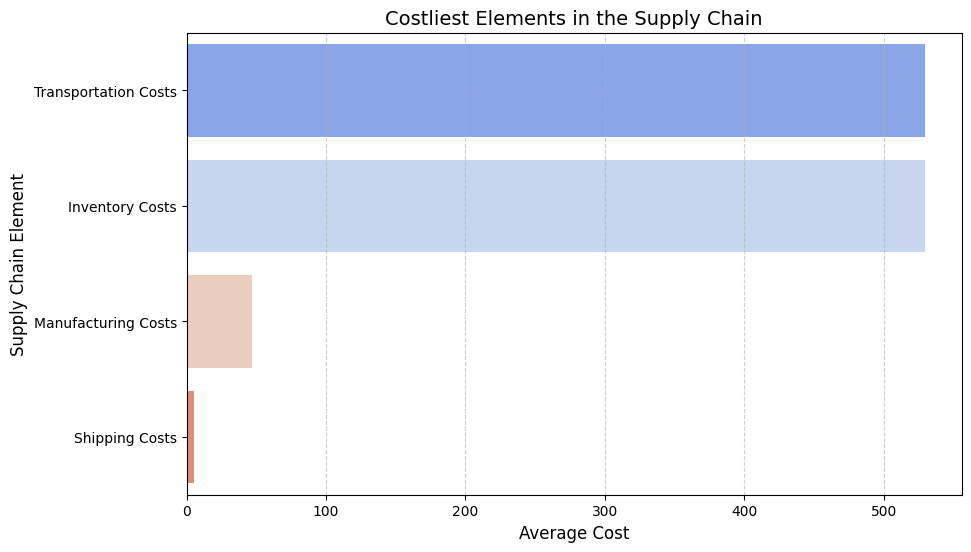

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Compute average costs for different supply chain elements
cost_elements = {
    "Manufacturing Costs": df["Manufacturing costs"].mean(),
    "Shipping Costs": df["Shipping costs"].mean(),
    "Transportation Costs": df["Costs"].mean(),  # Assuming 'Costs' refers to transportation
    "Inventory Costs": df["Costs"].mean()  # If inventory cost is also in 'Costs'
}

# Convert to DataFrame for visualization
cost_df = pd.DataFrame(list(cost_elements.items()), columns=["Cost_Type", "Avg_Cost"])
cost_df = cost_df.sort_values(by="Avg_Cost", ascending=False)

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.barplot(data=cost_df, x="Avg_Cost", y="Cost_Type", palette="coolwarm")

# Labels and title
plt.xlabel("Average Cost", fontsize=12)
plt.ylabel("Supply Chain Element", fontsize=12)
plt.title("Costliest Elements in the Supply Chain", fontsize=14)

# Show grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


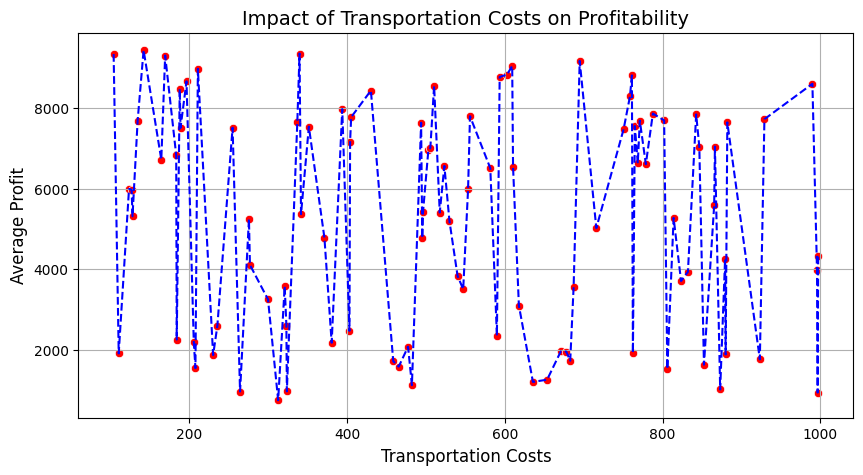

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = "/kaggle/input/supply/cleaned_supply_chain_data.csv"
df = pd.read_csv(file_path)

# Calculate profitability by subtracting transportation costs from revenue
df["Profit"] = df["Revenue generated"] - df["Costs"]  # Assuming 'Costs' includes transportation

# Group by Transportation Costs and calculate average profit
transport_profit = df.groupby("Costs")["Profit"].mean().reset_index()

# Sort by transportation costs for better visualization
transport_profit = transport_profit.sort_values(by="Costs")

# Set figure size
plt.figure(figsize=(10, 5))

# Create a scatter plot to show the impact of transportation costs on profitability
sns.scatterplot(data=transport_profit, x="Costs", y="Profit", color="red")

# Add a trend line for better interpretation
sns.lineplot(data=transport_profit, x="Costs", y="Profit", color="blue", linestyle="dashed")

# Labels and title
plt.xlabel("Transportation Costs", fontsize=12)
plt.ylabel("Average Profit", fontsize=12)
plt.title("Impact of Transportation Costs on Profitability", fontsize=14)

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()
